In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv('Car Price.csv')

In [3]:
dataset.shape

(205, 26)

In [4]:
dataset.head(50)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


## Data Analysis

In [5]:
#checking for nan values
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>=1]
features_nan
#no nan values

[]

In [6]:
#fetching the data for numerical features
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']
len(numerical_features)

16

In [7]:
#fetching discrete features
discrete_feature=[feature for feature in numerical_features if dataset[feature].dtypes=='int64' and feature not in ['car_ID']]
dataset[discrete_feature]

,symboling,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg
0,3,2548,130,111,5000,21,27
1,3,2548,130,111,5000,21,27
2,1,2823,152,154,5000,19,26
3,2,2337,109,102,5500,24,30
4,2,2824,136,115,5500,18,22
...,...,...,...,...,...,...,...
200,-1,2952,141,114,5400,23,28
201,-1,3049,141,160,5300,19,25
202,-1,3012,173,134,5500,18,23
203,-1,3217,145,106,4800,26,27


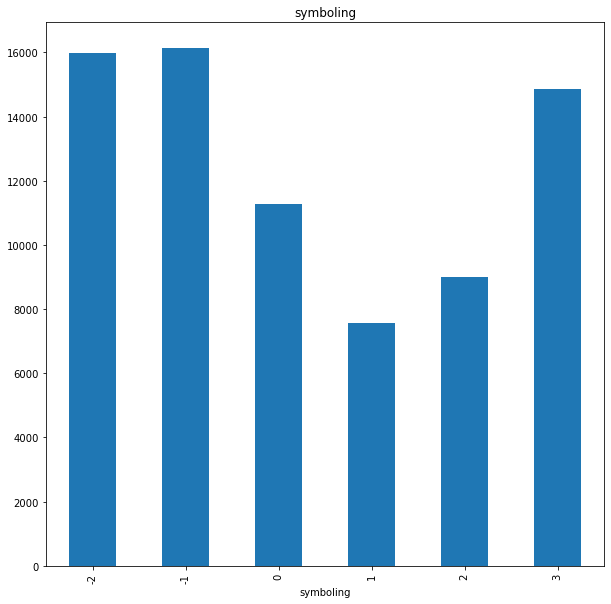

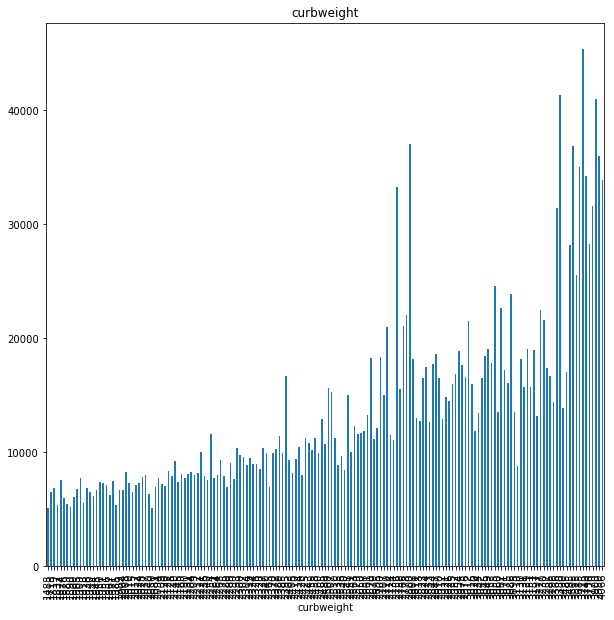

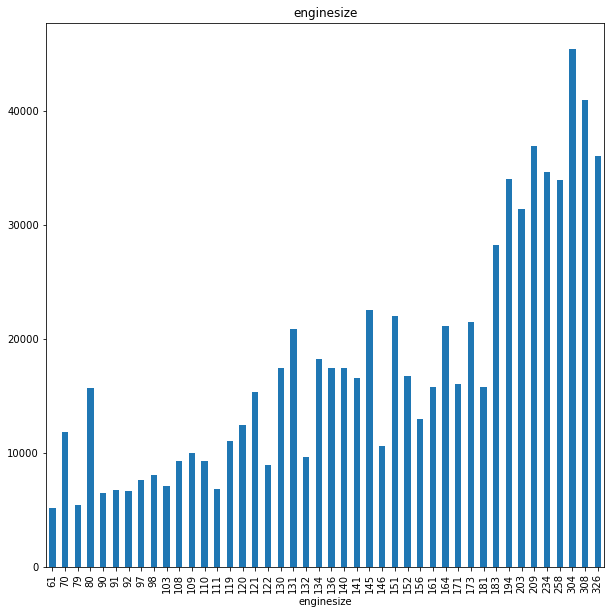

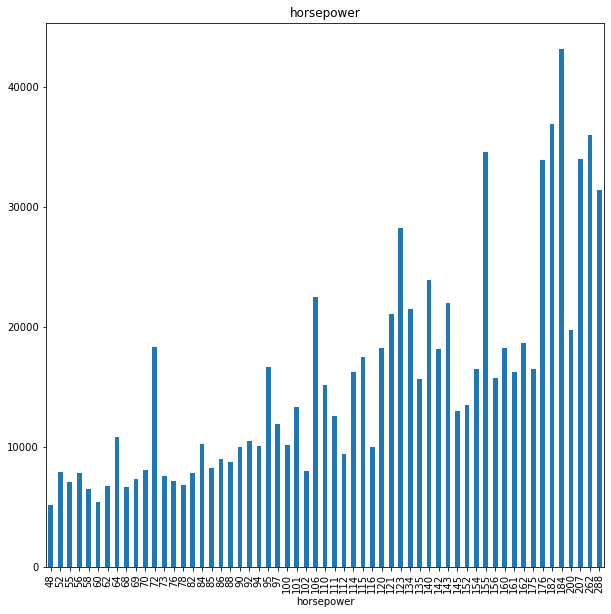

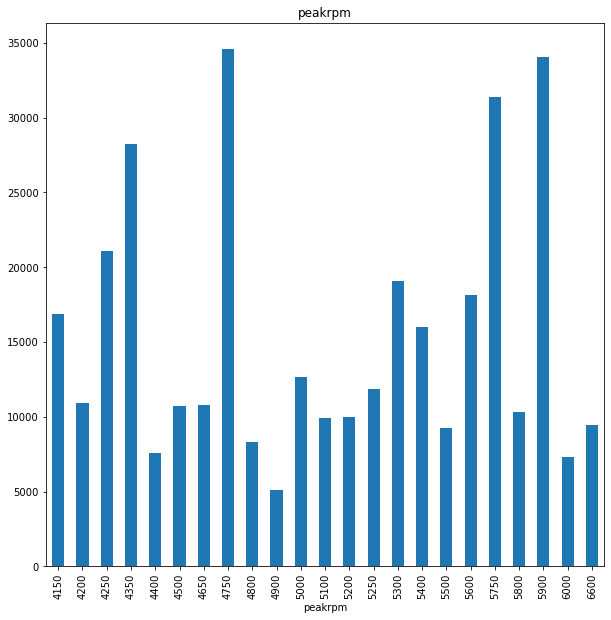

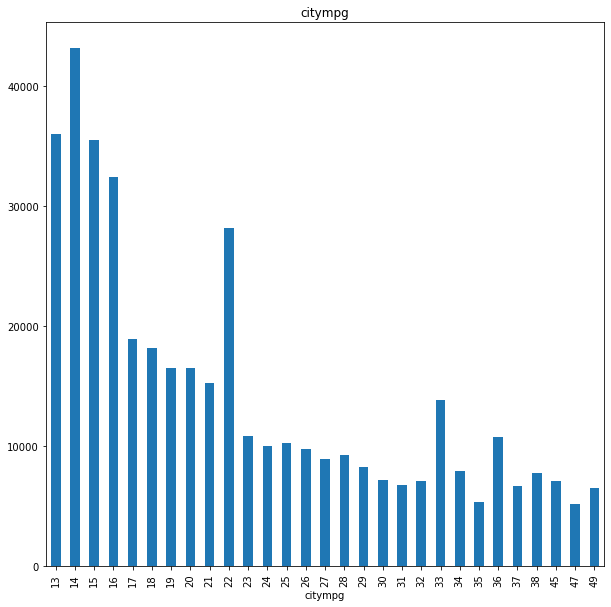

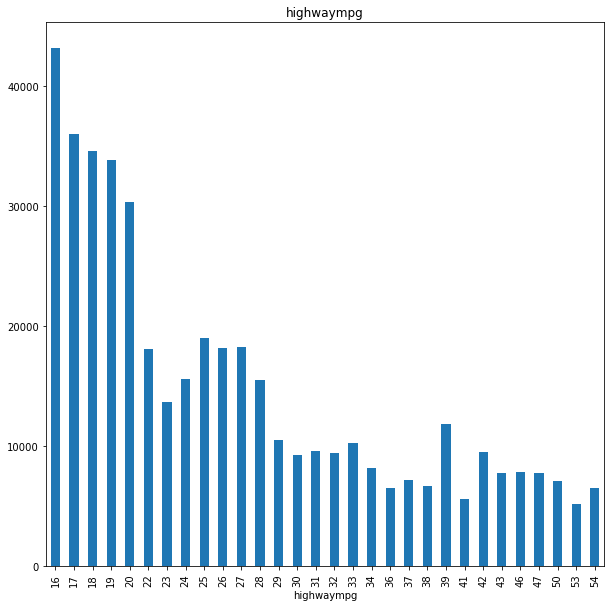

In [8]:
#plotting bar plot for discrete features
for feature in discrete_feature:
    data=dataset.copy()
    
    plt.figure(figsize=(10,10))

    data.groupby(data[feature])['price'].median().plot.bar()
    plt.title(feature)
    #here plt.show() is displaying the graph
    plt.show()

#more the price greater the car is safe in symboling
#as the mileage increases price decreases in city mpg
#as the mileage increases price decreases in highway mpg
#curbweight got an linear relation
#increases the price engine size increases
#increases the price horse power also increases




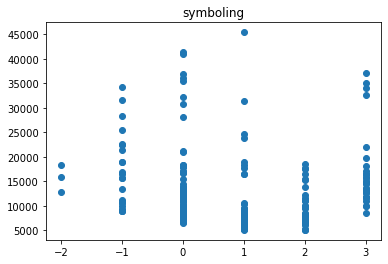

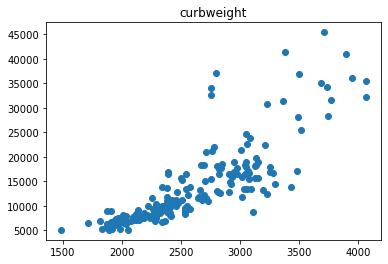

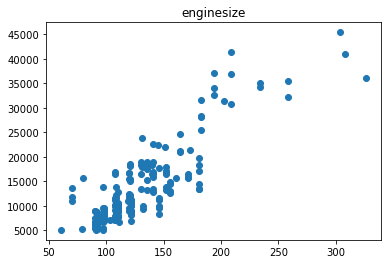

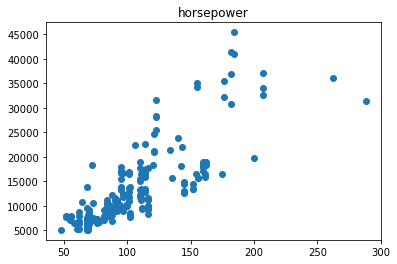

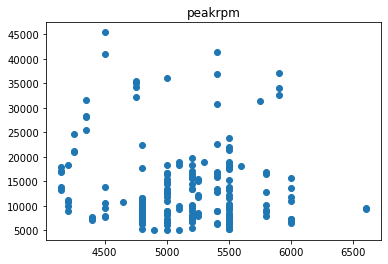

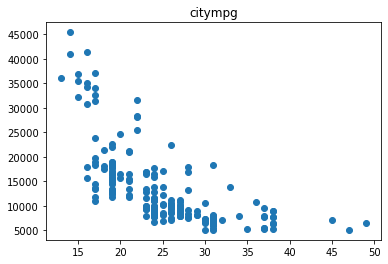

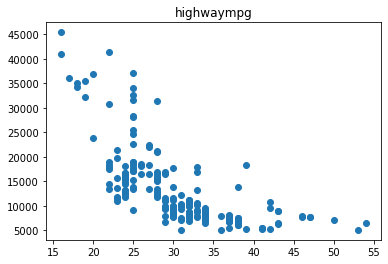

In [9]:
#plotting the scatter plot fo the discrete features
for feature in discrete_feature:
    data=dataset.copy()
    
    plt.scatter(data[feature], data['price'])
    plt.title(feature)
    #here plt.show() is displaying the graph
    plt.show()


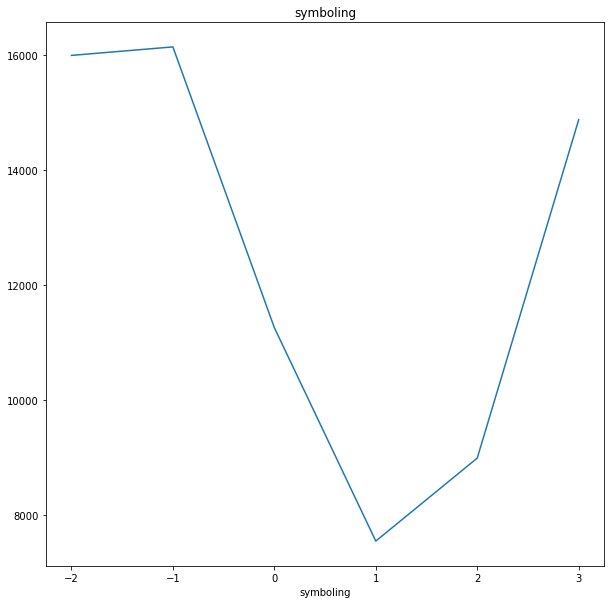

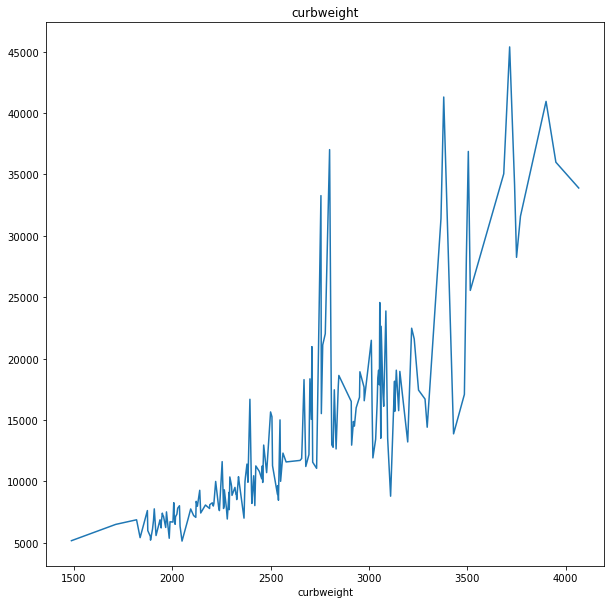

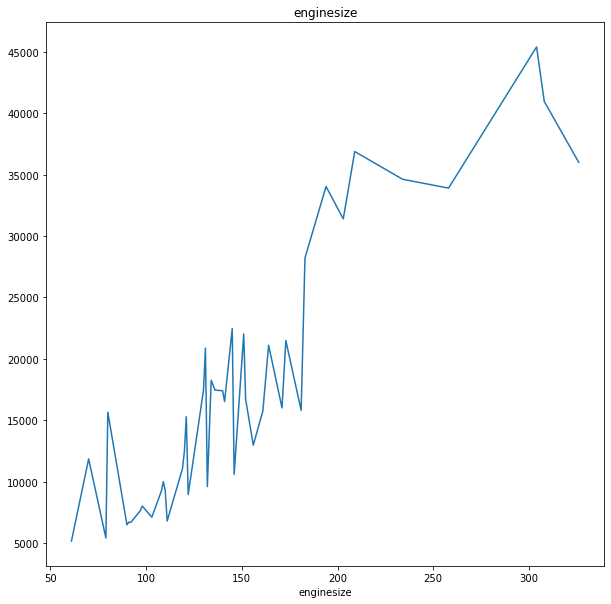

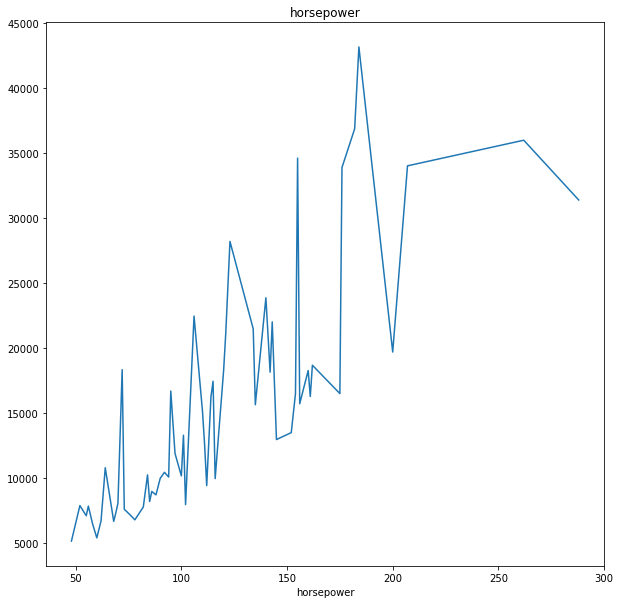

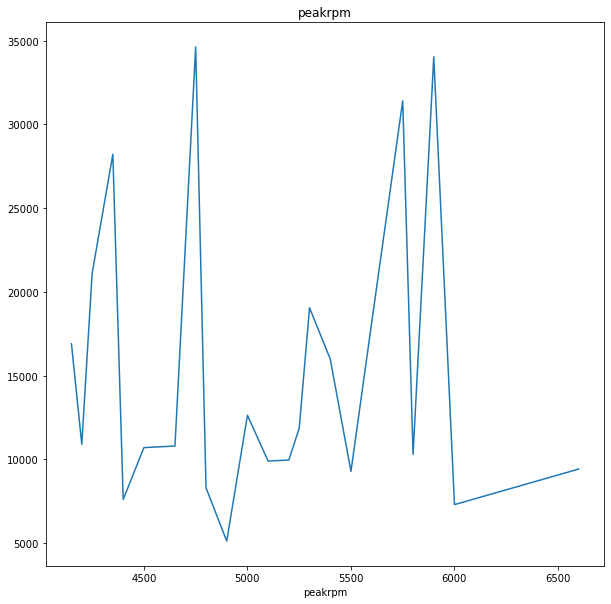

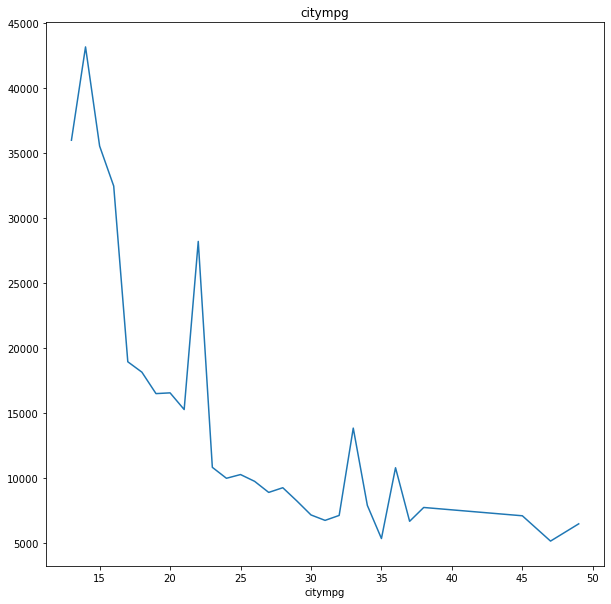

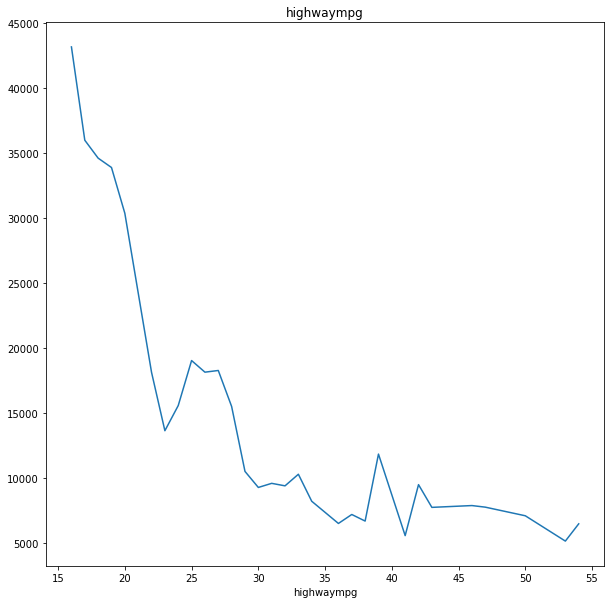

In [10]:
#plotting the line plot of discrete features
for feature in discrete_feature:
    data=dataset.copy()
    
    plt.figure(figsize=(10,10))

    data.groupby(data[feature])['price'].median().plot()
    plt.title(feature)
    #here plt.show() is displaying the graph
    plt.show()

<AxesSubplot:xlabel='enginesize'>

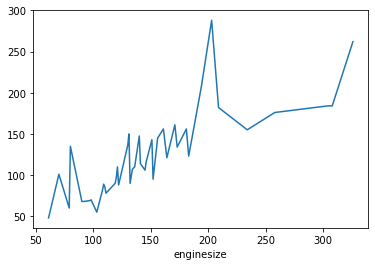

In [11]:
#checking the relation between the enginesize and its horsepower
dataset.groupby(dataset['enginesize'])['horsepower'].median().plot()
#more the engine size greater the horsepower

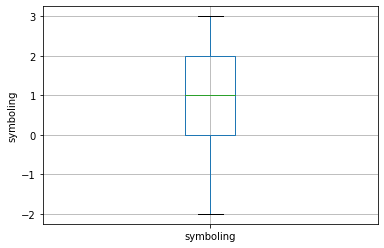

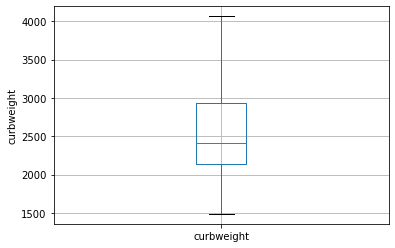

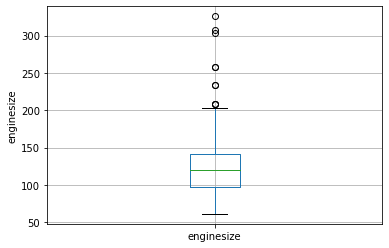

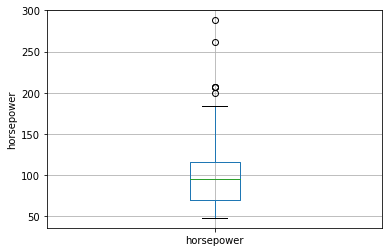

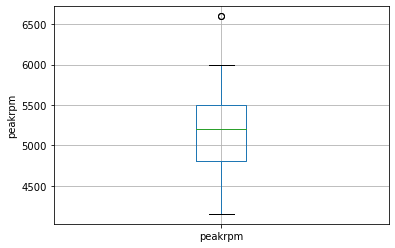

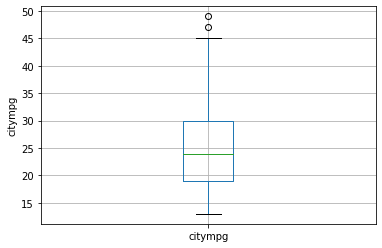

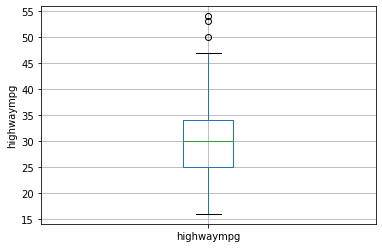

In [12]:
#checking for the outliers in discrete features
for feature in discrete_feature:
    dataset.boxplot(column=feature)
    plt.ylabel(feature)
    plt.show()

#enginesize have got outliers
#horsepower has got outliers
#peakrpm and citympg and highwaympg have got outliers


In [13]:
##continuous features
continuous_feature=[feature for feature in numerical_features if dataset[feature].dtypes=='float']
dataset[continuous_feature]

,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,price
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,13495.0
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,16500.0
2,94.5,171.2,65.5,52.4,2.68,3.47,9.0,16500.0
3,99.8,176.6,66.2,54.3,3.19,3.40,10.0,13950.0
4,99.4,176.6,66.4,54.3,3.19,3.40,8.0,17450.0
...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,3.78,3.15,9.5,16845.0
201,109.1,188.8,68.8,55.5,3.78,3.15,8.7,19045.0
202,109.1,188.8,68.9,55.5,3.58,2.87,8.8,21485.0
203,109.1,188.8,68.9,55.5,3.01,3.40,23.0,22470.0


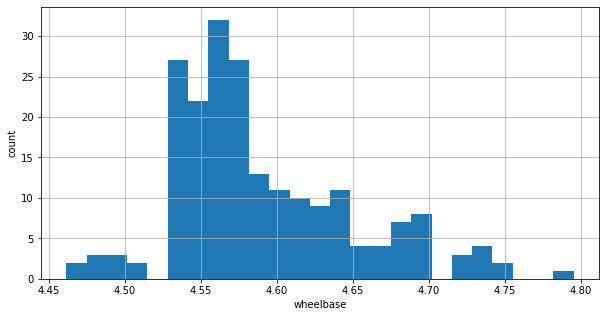

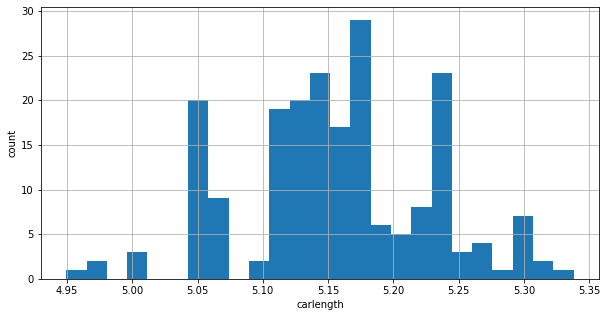

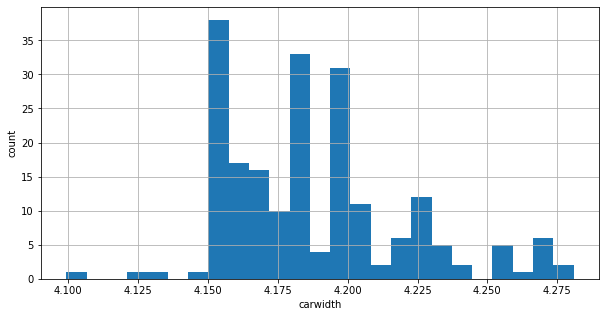

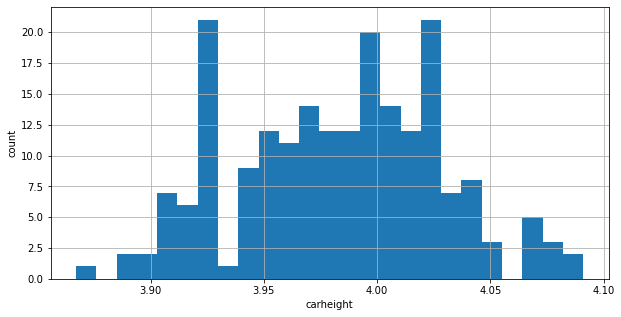

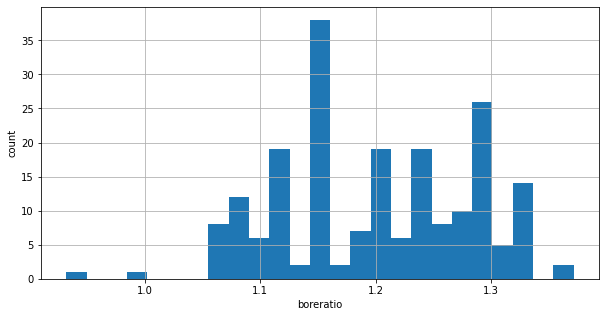

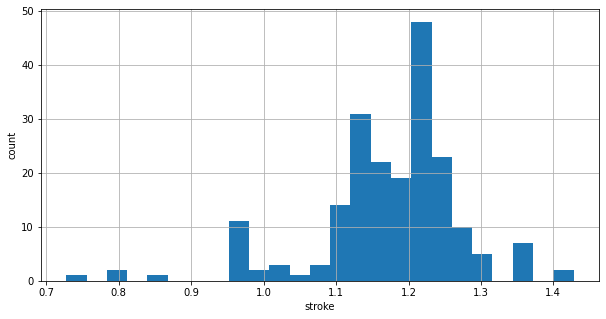

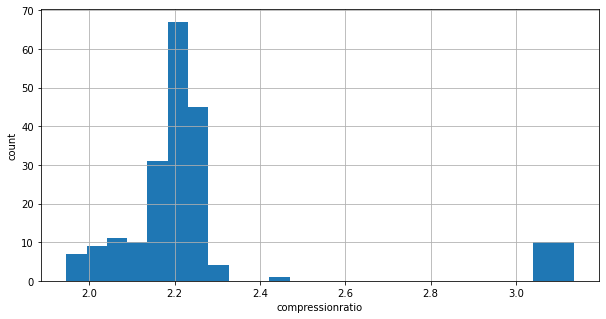

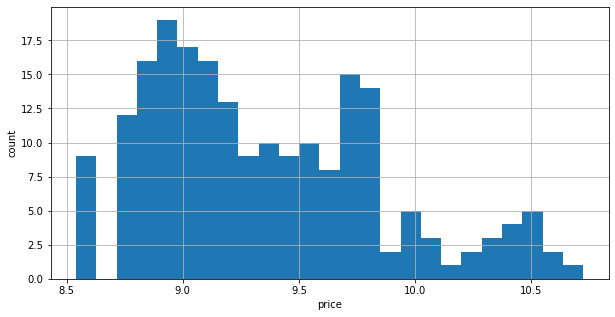

In [14]:
#in continuous variable we noticed that some showed gussian distribution and some didnot so to convert those into gussian distribution we will be using log
#logarithmic transformation as it removes skewness of our data
for feature in continuous_feature:
    data=dataset.copy()
    plt.figure(figsize=(10,5))
    data[feature]=np.log(data[feature])
    #plt.scatter(data[feature], data['price'])



    data[feature].hist(bins=25)
    
    plt.xlabel(feature)
    plt.ylabel('count')
    #here plt.show() is displaying the graph
    plt.show()

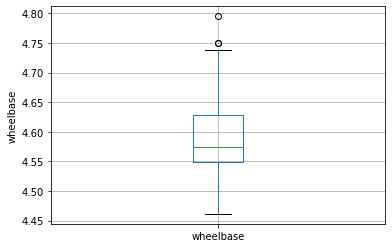

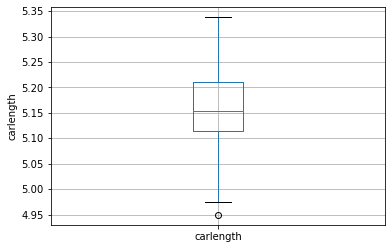

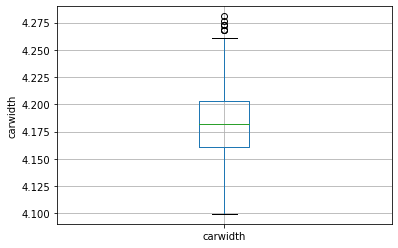

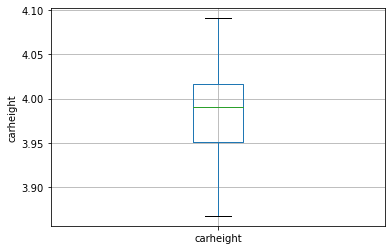

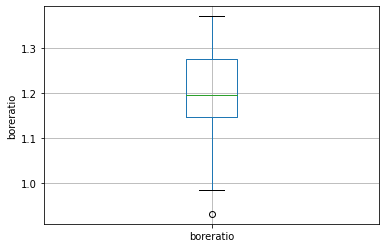

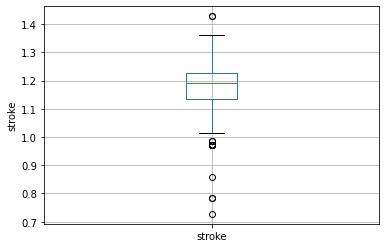

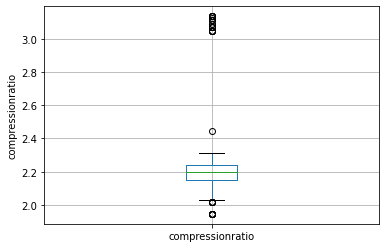

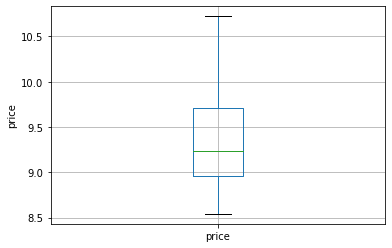

In [15]:
#checking for the outliers in continuous data
for feature in continuous_feature:
    data=dataset.copy()
    #here we are setting condition of 0 becz log 0 is not defined
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.show()
        
        
    
#outliers are present in our data

In [16]:
##analyzing categorical features
categorical_feature=[feature for feature in dataset.columns if feature not in numerical_features]
dataset[categorical_feature]

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [17]:
for feature in categorical_feature:
    print(feature, len(dataset[feature].unique()))

CarName 147
fueltype 2
aspiration 2
doornumber 2
carbody 5
drivewheel 3
enginelocation 2
enginetype 7
cylindernumber 7
fuelsystem 8


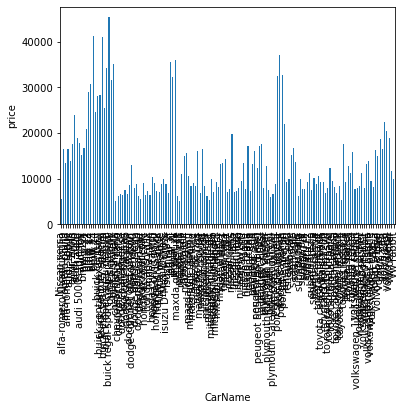

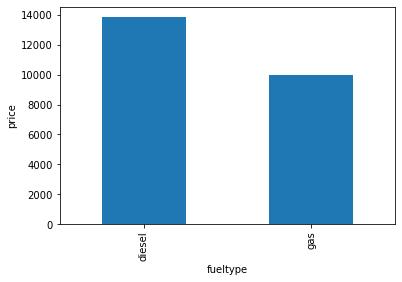

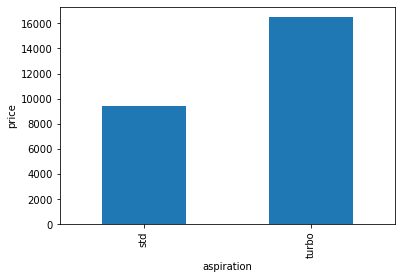

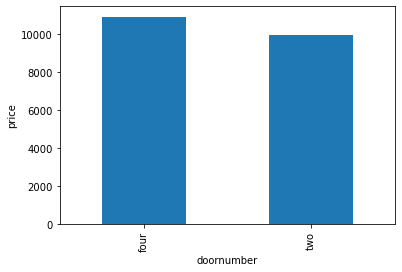

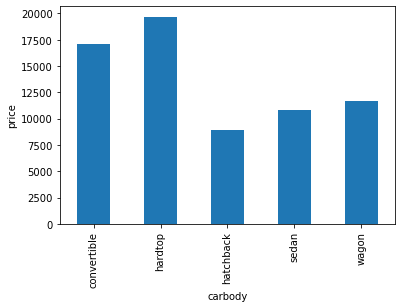

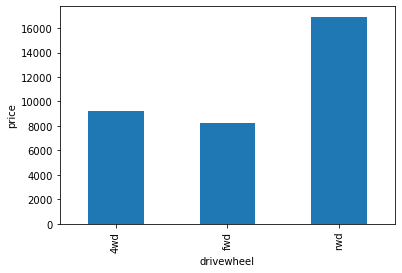

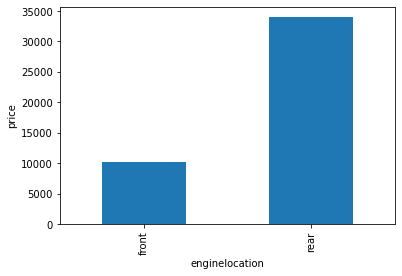

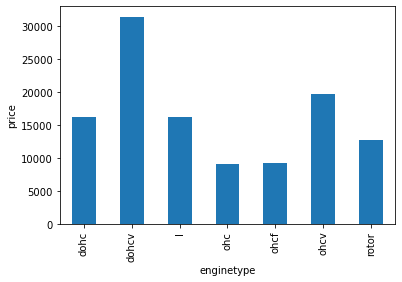

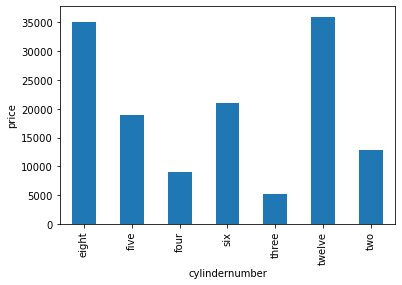

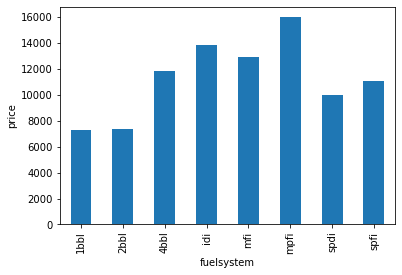

In [18]:
for feature in categorical_feature:
    data=dataset.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.show()

#diesel cars are expensive
#cars with turbo are also expensive
#cars with 4 doors are expensive
#least expensive is hatchback where the cars with the hardtop has got greater price
#rwd is more expensive
#if engine location is rear so more price
#dohcv engine type is more expensive
#mpfi has greater price

In [19]:
#we splited the carname into a comany name to analyze which company sold more cars etc
data=dataset.copy()
# new data frame with split value columns 
x=data["CarName"].str.split(" ", n = 1, expand = True) 
data['Company']=x[0]
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


<AxesSubplot:xlabel='Company'>

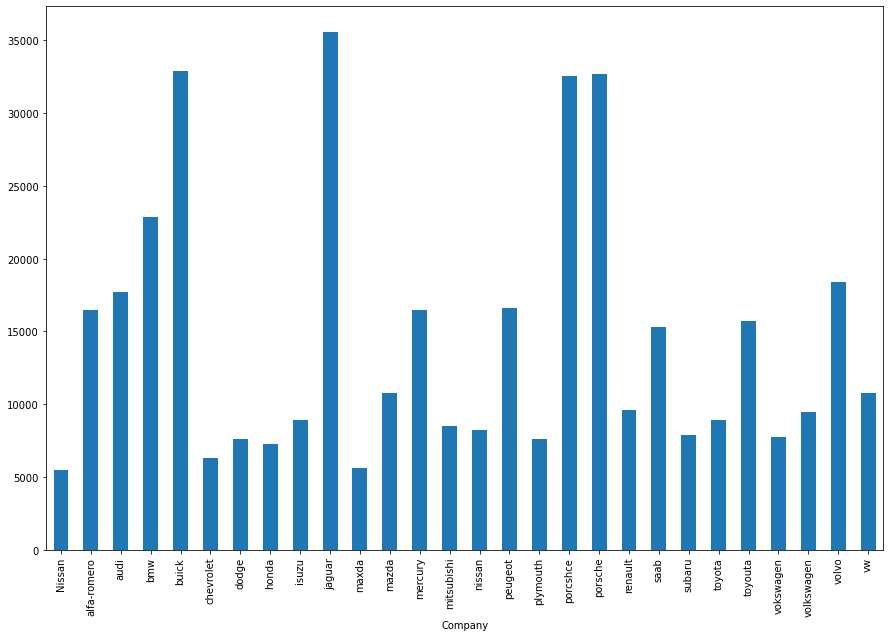

In [20]:
plt.figure(figsize=(15,10))
data.groupby('Company')['price'].median().plot.bar()
#jaguar cars were very expensive, maxda has got cheaper cars

Text(0.5, 1.0, 'Comapny manufactured Cars')

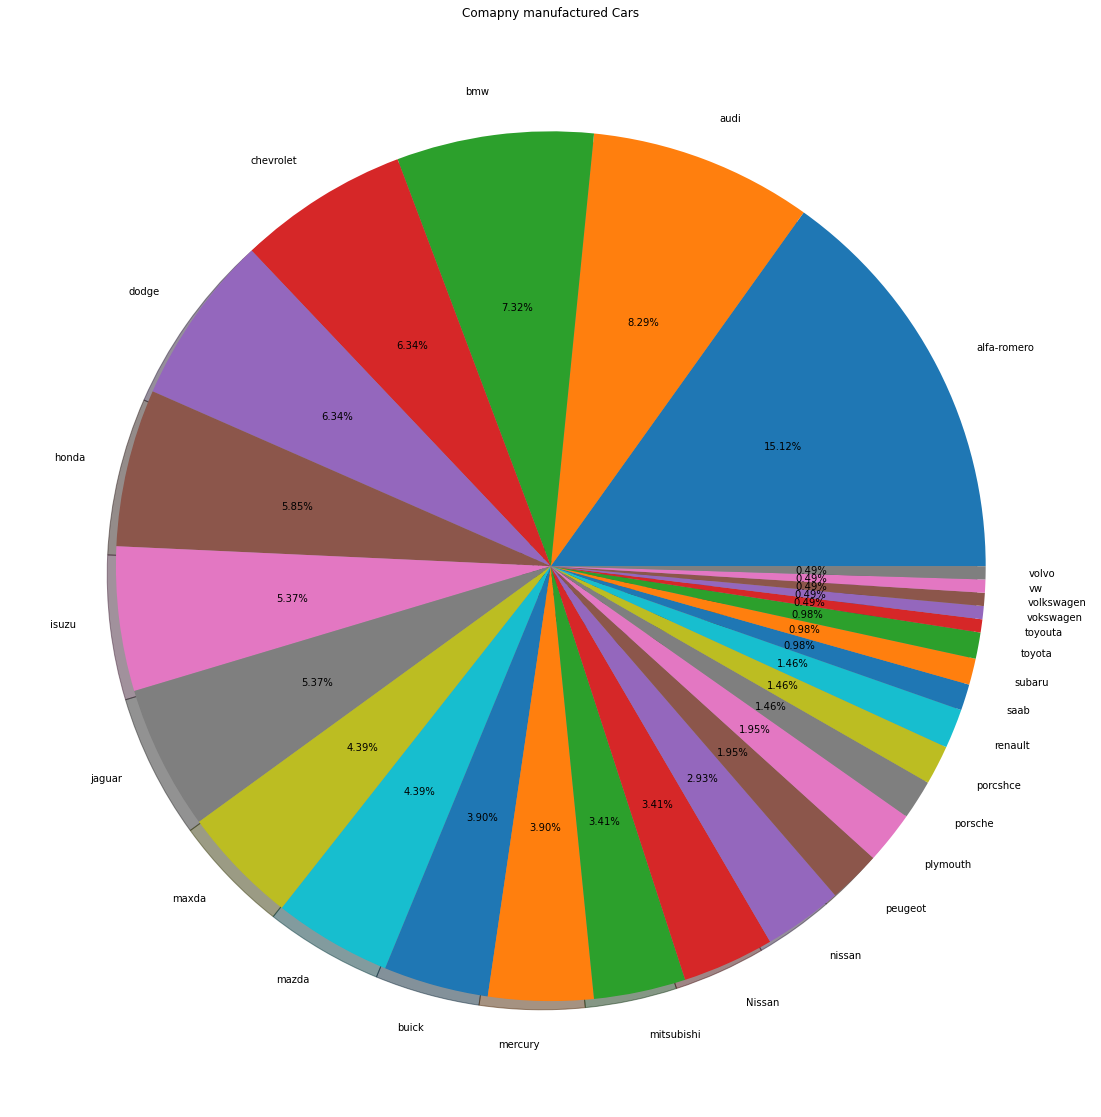

In [21]:
death_anae = data['Company'].value_counts()
plt.figure(figsize=(20,20))
#myexplode = [0.1, 0, 0.2, 0]
plt.pie(death_anae, autopct='%1.2f%%',labels=data['Company'].unique(), shadow=True)
plt.title('Comapny manufactured Cars')
#alfa romero has sold great quantity of cars and volvo, volswagon and toyota has sold least cars

## Feature Engineering

In [22]:
#removing the outliers in discrete features
for feature in discrete_feature:
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])

In [23]:
q1 = dataset.horsepower.quantile(0.25)
q3 = dataset.horsepower.quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in dataset.index:
    if dataset.loc[i, 'horsepower'] > toprange:
        dataset.loc[i, 'horsepower'] = toprange
    if dataset.loc[i, 'horsepower'] < botrange:
        dataset.loc[i, 'horsepower'] = botrange
        
q1 = dataset.citympg.quantile(0.25)
q3 = dataset.citympg.quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in dataset.index:
    if dataset.loc[i, 'citympg'] > toprange:
        dataset.loc[i, 'citympg'] = toprange
    if dataset.loc[i, 'citympg'] < botrange:
        dataset.loc[i, 'citympg'] = botrange

q1 = dataset.highwaympg.quantile(0.25)
q3 = dataset.highwaympg.quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in dataset.index:
    if dataset.loc[i, 'highwaympg'] > toprange:
        dataset.loc[i, 'highwaympg'] = toprange
    if dataset.loc[i, 'highwaympg'] < botrange:
        dataset.loc[i, 'highwaympg'] = botrange
        
q1 = dataset.enginesize.quantile(0.25)
q3 = dataset.enginesize.quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in dataset.index:
    if dataset.loc[i, 'enginesize'] > toprange:
        dataset.loc[i, 'enginesize'] = toprange
    if dataset.loc[i, 'enginesize'] < botrange:
        dataset.loc[i, 'enginesize'] = botrange

        

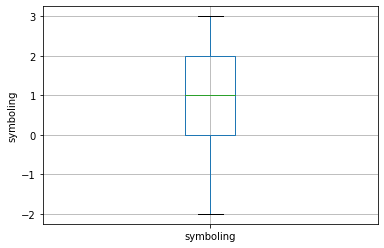

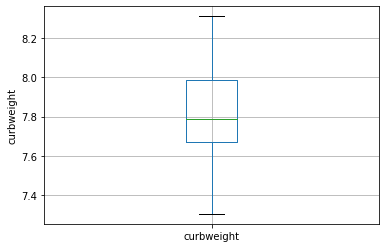

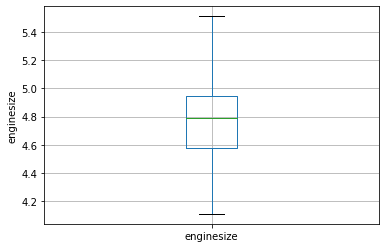

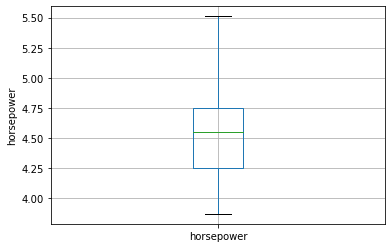

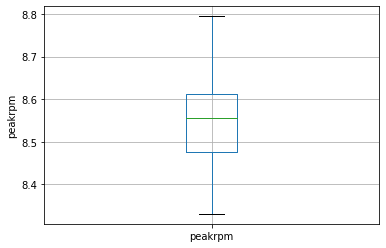

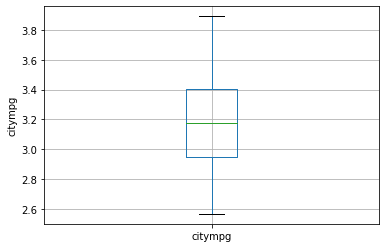

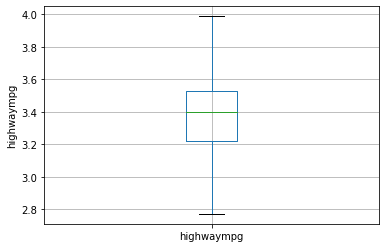

In [24]:
#checking for the outliers in discrete features
for feature in discrete_feature:
    dataset.boxplot(column=feature)
    plt.ylabel(feature)
    plt.show()

In [25]:
#removing the outliers in continuous feature
for feature in continuous_feature:
    #here we are setting condition of 0 becz log 0 is not defined
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])

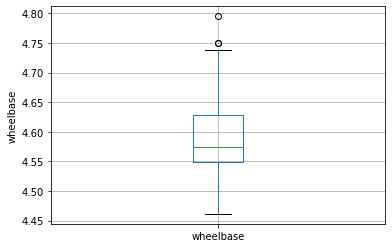

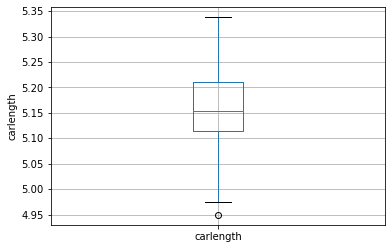

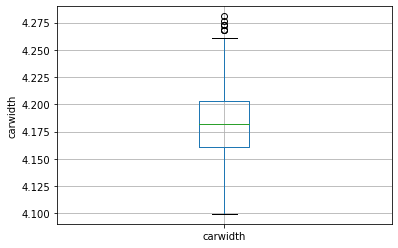

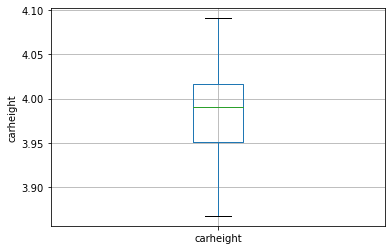

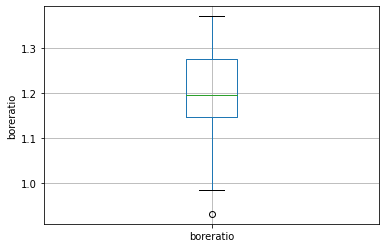

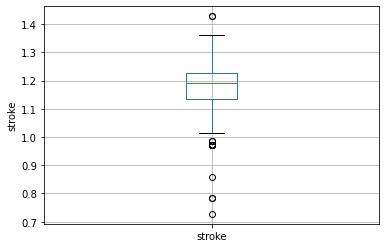

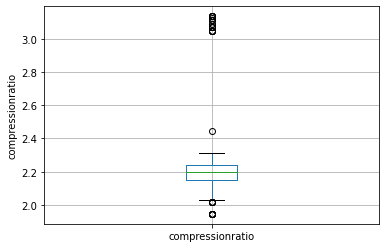

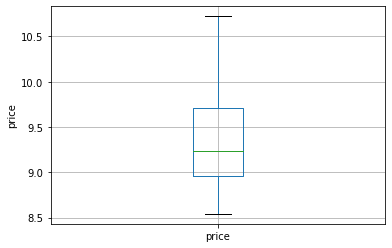

In [26]:
for feature in continuous_feature:
    dataset.boxplot(column=feature)
    plt.ylabel(feature)
    plt.show()

In [27]:
#removing the outliers in continuous data
q1 = dataset.carwidth.quantile(0.25)
q3 = dataset.carwidth.quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in dataset.index:
    if dataset.loc[i, 'carwidth'] > toprange:
        dataset.loc[i, 'carwidth'] = toprange
    if dataset.loc[i, 'carwidth'] < botrange:
        dataset.loc[i, 'carwidth'] = botrange

q1 = dataset.wheelbase.quantile(0.25)
q3 = dataset.wheelbase.quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in dataset.index:
    if dataset.loc[i, 'wheelbase'] > toprange:
        dataset.loc[i, 'wheelbase'] = toprange
    if dataset.loc[i, 'wheelbase'] < botrange:
        dataset.loc[i, 'wheelbase'] = botrange

q1 = dataset.stroke.quantile(0.25)
q3 = dataset.stroke.quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in dataset.index:
    if dataset.loc[i, 'stroke'] > toprange:
        dataset.loc[i, 'stroke'] = toprange
    if dataset.loc[i, 'stroke'] < botrange:
        dataset.loc[i, 'stroke'] = botrange

q1 = dataset.compressionratio.quantile(0.25)
q3 = dataset.compressionratio.quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in dataset.index:
    if dataset.loc[i, 'compressionratio'] > toprange:
        dataset.loc[i, 'compressionratio'] = toprange
    if dataset.loc[i, 'compressionratio'] < botrange:
        dataset.loc[i, 'compressionratio'] = botrange

In [28]:
x=dataset["CarName"].str.split(" ", n = 1, expand = True)
dataset['company']=x[0]
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,4.484132,...,mpfi,1.244155,0.996488,2.197225,4.709530,8.517193,3.044522,3.295837,9.510075,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,4.484132,...,mpfi,1.244155,0.996488,2.197225,4.709530,8.517193,3.044522,3.295837,9.711116,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,4.548600,...,mpfi,0.985817,1.244155,2.197225,5.036953,8.517193,2.944439,3.258097,9.711116,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,4.603168,...,mpfi,1.160021,1.223775,2.302585,4.624973,8.612503,3.178054,3.401197,9.543235,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,4.599152,...,mpfi,1.160021,1.223775,2.079442,4.744932,8.612503,2.890372,3.091042,9.767095,audi


In [29]:
# replace missplled company_name
for name in dataset['company']:
    if name=='vw':
        dataset['company'].replace('vw','volkswagen', inplace=True)
    if name=='vokswagen':
        dataset['company'].replace('vokswagen','volkswagen', inplace=True)
    if name=='porcshce':
        dataset['company'].replace('porcshce','porsche', inplace=True)
    if name=='toyouta':
        dataset['company'].replace('toyouta','toyota', inplace=True)
    if name=='maxda':
        dataset['company'].replace('maxda','mazda', inplace=True)
    if name=='Nissan':
        dataset['company'].replace('Nissan','nissan', inplace=True)


In [30]:
dataset['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [31]:
dataset=dataset.drop(columns=['CarName', 'car_ID'],axis=1)
categorical_feature=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']

#for feature in categorical_feature:
    #here we calculated the percentage
 #   temp=dataset.groupby(feature)['price'].count()/len(dataset)
    #we get our index of feature or sirf un values ko rakha jo 1 percent se ziyada thi
  #  temp_df=temp[temp>0.01].index
    #or yahn pe check kreinge ka jo col ki values nai ayi temp_df ma unhe hum rare_var se replace krdeinge
   # dataset[feature]=np.where(dataset[feature].isin (temp_df), data[feature], 'rare_var')

In [32]:
categorical_feature

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'company']

In [33]:
dataset.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,gas,std,two,convertible,rwd,front,4.484132,5.128715,4.160444,...,mpfi,1.244155,0.996488,2.197225,4.709530,8.517193,3.044522,3.295837,9.510075,alfa-romero
1,3,gas,std,two,convertible,rwd,front,4.484132,5.128715,4.160444,...,mpfi,1.244155,0.996488,2.197225,4.709530,8.517193,3.044522,3.295837,9.711116,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,4.548600,5.142832,4.182050,...,mpfi,0.985817,1.244155,2.197225,5.036953,8.517193,2.944439,3.258097,9.711116,alfa-romero
3,2,gas,std,four,sedan,fwd,front,4.603168,5.173887,4.192680,...,mpfi,1.160021,1.223775,2.302585,4.624973,8.612503,3.178054,3.401197,9.543235,audi
4,2,gas,std,four,sedan,4wd,front,4.599152,5.173887,4.195697,...,mpfi,1.160021,1.223775,2.079442,4.744932,8.612503,2.890372,3.091042,9.767095,audi


In [35]:
## feature scaling
feature_scale=[feature for feature in dataset.columns if feature not in ['price']]
from sklearn.preprocessing import LabelEncoder
#now we will be performing the following step because to convert our string values to a numeric value
for feature in categorical_feature:
    le=LabelEncoder()
    dataset[feature]=le.fit_transform(dataset[feature])

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [36]:
data = pd.concat([dataset[['price']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [37]:
data.head()

,price,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,company
0,9.510075,1.0,1.0,0.0,1.0,0.00,1.0,0.0,0.079273,0.461320,...,0.540874,0.714286,0.710658,0.000000,0.502779,0.511166,0.401606,0.361432,0.430657,0.000000
1,9.711116,1.0,1.0,0.0,1.0,0.00,1.0,0.0,0.079273,0.461320,...,0.540874,0.714286,0.710658,0.000000,0.502779,0.511166,0.401606,0.361432,0.430657,0.000000
2,9.711116,0.6,1.0,0.0,1.0,0.50,1.0,0.0,0.303107,0.497655,...,0.652633,0.714286,0.122211,0.672351,0.502779,0.710810,0.401606,0.286003,0.399595,0.000000
3,9.543235,0.8,1.0,0.0,0.0,0.75,0.5,0.0,0.492569,0.577579,...,0.414933,0.714286,0.519016,0.617027,0.798910,0.459608,0.607033,0.462068,0.517374,0.047619
4,9.767095,0.8,1.0,0.0,0.0,0.75,0.0,0.0,0.478625,0.577579,...,0.573127,0.714286,0.519016,0.617027,0.171732,0.532753,0.607033,0.245256,0.262102,0.047619


## Feature Selection

In [38]:
Y=data.price
X=data.drop(columns=['price'],axis=1)

In [39]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [41]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X,Y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [42]:
feature_sel_model.get_support()

array([False,  True, False,  True, False,  True,  True, False, False,
        True, False,  True, False, False,  True,  True, False,  True,
        True,  True, False,  True, False,  True])

In [43]:
selected_col=X.columns[feature_sel_model.get_support()]

In [44]:
X=X[selected_col]

In [45]:
X.head()

,fueltype,doornumber,drivewheel,enginelocation,carwidth,curbweight,enginesize,fuelsystem,stroke,compressionratio,horsepower,citympg,company
0,1.0,1.0,1.0,0.0,0.363766,0.535079,0.540874,0.714286,0.000000,0.502779,0.511166,0.361432,0.000000
1,1.0,1.0,1.0,0.0,0.363766,0.535079,0.540874,0.714286,0.000000,0.502779,0.511166,0.361432,0.000000
2,1.0,1.0,1.0,0.0,0.492373,0.637038,0.652633,0.714286,0.672351,0.502779,0.710810,0.286003,0.000000
3,1.0,0.0,0.5,0.0,0.555649,0.449088,0.414933,0.714286,0.617027,0.798910,0.459608,0.462068,0.047619
4,1.0,0.0,0.0,0.0,0.573605,0.637390,0.573127,0.714286,0.617027,0.171732,0.532753,0.245256,0.047619


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=1)

## Model Building

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [49]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [50]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [51]:
rf = RandomForestRegressor()

In [52]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 20, cv = 15, verbose=2, random_state=42, n_jobs = 1)

In [53]:
rf_random.fit(X_train,y_train)

Fitting 15 folds for each of 20 candidates, totalling 300 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=9

[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   1.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_depth=25, max_featu

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   1.2s
[CV] END max_depth=20, max_featu

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=25,

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt

RandomizedSearchCV(cv=15, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [54]:
predictions=rf_random.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

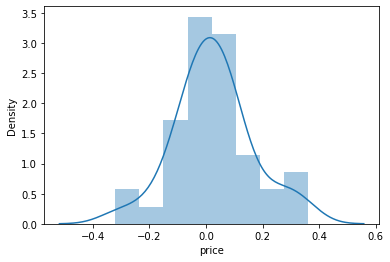

In [55]:
sns.distplot(y_test-predictions)

In [57]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R_square score: ", r2_score(y_test,predictions))

MAE: 0.10320876965860341
MSE: 0.019345941249296474
RMSE: 0.13908968778919764
R_square score:  0.9178940607125717


In [58]:
##pickling
import pickle
file = open('Car Price Prediction.pkl', 'wb')
#it's the process of converting a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network.
#dump takes the object which we gave as our randomsearchcv and the file which we already gave as the name of file
pickle.dump(rf_random, file)